# Objective

**Day 13 of the [#30DayChartChallenge challenge](https://github.com/Z3tt/30DayChartChallenge_Collection2021/blob/main/README.md)**

**Topic: 13. correlation**

Used Dataset: https://www.kaggle.com/burhanykiyakoglu/predicting-house-prices?select=kc_house_data.csv

Code for correlation matrix inspired by https://stackoverflow.com/questions/34556180/how-can-i-plot-a-correlation-matrix-as-a-set-of-ellipses-similar-to-the-r-open

# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import EllipseCollection
import seaborn as sns
sns.set_theme(style="ticks")

# Read Data

In [2]:
df_penguins = pd.read_csv("../data/penguins/penguins.csv")
df_penguins.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:
df_penguins.tail()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
343,344,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female,2009


In [4]:
df_penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [5]:
df_penguins = df_penguins[["species", "island", "bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g", "sex", "year"]]

# Correlation Plots

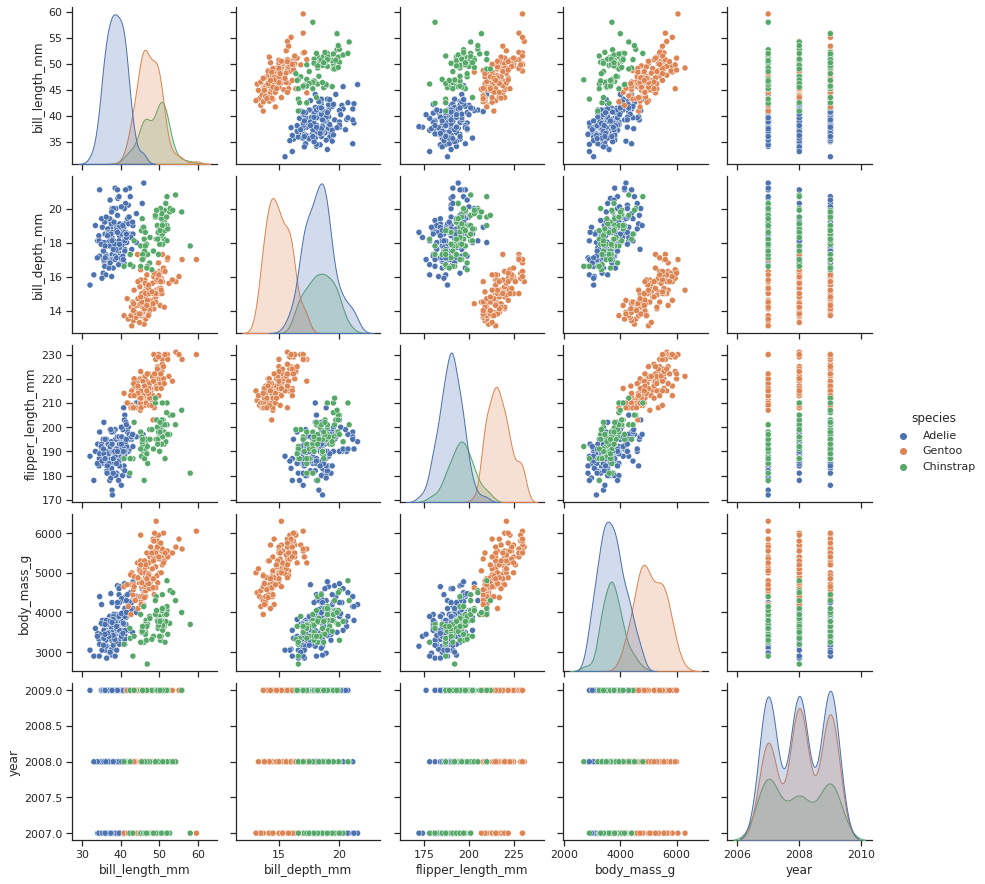

In [6]:
sns.pairplot(df_penguins, hue="species");

In [7]:
df_Adelie = df_penguins[df_penguins["species"] == "Adelie"]
df_Gentoo = df_penguins[df_penguins["species"] == "Gentoo"]
df_Chinstrap = df_penguins[df_penguins["species"] == "Chinstrap"]

In [8]:
def plot_corr_ellipses(data, **kwargs):

    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
        
    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel()
    h = 1 - np.abs(M).ravel()
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           transOffset=ax.transData, array=M.ravel(), edgecolor='black', **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec

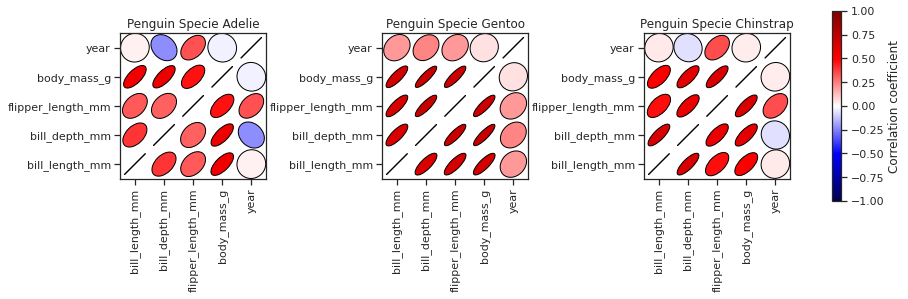

In [9]:
corr_Adelie = df_Adelie.corr()
corr_Gentoo = df_Gentoo.corr()
corr_Chinstrap = df_Chinstrap.corr()
data = [corr_Adelie, corr_Gentoo, corr_Chinstrap]
title = ["Penguin Specie Adelie", "Penguin Specie Gentoo", "Penguin Specie Chinstrap"]

fig, axes = plt.subplots(1, 3, figsize=(15, 35), subplot_kw={'aspect':'equal'})
plt.subplots_adjust(wspace=.8)
for i, ax in enumerate(axes.flatten()):
    m = plot_corr_ellipses(data[i], cmap='seismic')
    m.set_clim(-1, 1)
    ax.set_title(title[i])
cb = fig.colorbar(m, shrink=0.1, ax=axes.flatten().tolist())
cb.set_label('Correlation coefficient')
plt.savefig("../plots/day13_correlation.png", bbox_inches = 'tight')